In [371]:
import pandas as pd
from bs4 import BeautifulSoup 
import requests
import re
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [326]:
def get_district_coord(district):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(district) +'?format=json'
    response = requests.get(url).json()
    if len(response)==0:
        return [np.nan, np.nan]
    return [float(response[0]["lat"]),float(response[0]["lon"])]

In [276]:
def get_religion_population(religion_url):
    html_content=requests.get(religion_url).text
    soup=BeautifulSoup(html_content, 'lxml')
    table = soup.find_all('div', attrs={'class':'table-responsive'})[0]
    body = table.find_all("tr")
    head = body[0]
    body_rows = body[1:]
    all_rows=[]
    all_rows_dict={}
    population=int(re.sub("(\xa0)|(\n)|,","",body_rows[0].find_all("td")[1].text))
    district=re.sub("(\xa0)|(\n)|,","",head.find_all("th")[1].text)
    all_rows_dict['Disctrict']= district
    coord=get_district_coord(district)
    all_rows_dict['Latitude']=coord[0]
    all_rows_dict['Longitude']=coord[1]
    all_rows_dict['Population']=population
    for row_num in range(1, len(body_rows)):
        row=[]
        row.append(re.sub("(\xa0)|(\n)|,","",body_rows[row_num].find_all("td")[0].text))
        row.append(float(re.sub("(\xa0)|(\n)|,","",body_rows[row_num].find_all("td")[1].text[:-1])))
        row.append(round(row[1]*population/100))
        all_rows_dict[row[0]+'_Percentage']= row[1]
        all_rows_dict[row[0]+'_Population']= row[2]
        all_rows.append(row)
    return all_rows_dict

In [283]:
def state_wise_data_accumulation(state_url):
    district_wise_data=[]
    html_content=requests.get(state_url).text
    soup=BeautifulSoup(html_content, 'lxml')
    table = soup.find_all('div', attrs={'class':'table-responsive'})[1]
    body = table.find_all("tr")
    body_rows = body[1:]
    for item in body_rows:
         print(item.find_all('td')[0].text)
         district_wise_data.append(get_religion_population('https://www.census2011.co.in'+item.find_all('td')[0].find('a').get('href')))

    return district_wise_data

In [327]:
tot_data=[]
url='https://www.census2011.co.in/religion.php'
html_content=requests.get(url).text
soup=BeautifulSoup(html_content, 'lxml')
table = soup.find_all('div', attrs={'class':'table-responsive'})[1]
body = table.find_all("tr")
body_rows = body[1:]
for item in body_rows:
    tot_data+=state_wise_data_accumulation('https://www.census2011.co.in'+item.find_all('td')[0].find('a').get('href'))

Allahabad
Moradabad
Ghaziabad
Azamgarh
Lucknow
Kanpur Nagar
Jaunpur
Sitapur
Bareilly
Gorakhpur
Agra
Muzaffarnagar
Hardoi
Kheri
Sultanpur
Bijnor
Budaun
Varanasi
Aligarh
Ghazipur
Kushinagar
Bulandshahar
Bahraich
Saharanpur
Meerut
Gonda
Rae Bareli
Barabanki
Ballia
Pratapgarh
Unnao
Deoria
Shahjahanpur
Maharajganj
Fatehpur
Siddharth Nagar
Mathura
Firozabad
Mirzapur
Faizabad
Basti
Ambedkar Nagar
Rampur
Mau
Balrampur
Pilibhit
Jhansi
Chandauli
Farrukhabad
Mainpuri
Sonbhadra
Jyotiba Phule Nagar
Banda
Ramabai Nagar
Etah
Sant Kabir Nagar
Jalaun
Kannauj
Gautam Buddha Nagar
Kaushambi
Etawah
Sant Ravidas Nagar
Mahamaya Nagar
Kanshiram Nagar
Auraiya
Baghpat
Lalitpur
Shrawasti
Hamirpur
Chitrakoot
Mahoba
Thane
Pune
Mumbai Suburban
Nashik
Nagpur
Ahmadnagar
Solapur
Jalgaon
Kolhapur
Aurangabad
Nanded
Mumbai City
Satara
Amravati
Sangli
Yavatmal
Raigarh
Buldana
Bid
Latur
Chandrapur
Dhule
Jalna
Parbhani
Akola
Osmanabad
Nandurbar
Ratnagiri
Gondiya
Wardha
Bhandara
Washim
Hingoli
Gadchiroli
Sindhudurg
Patna
Pur

In [444]:
df=pd.DataFrame(tot_data)

In [366]:
df_without_outliers=df[df['Latitude']>=6.74678]
df_without_outliers=df_without_outliers[df_without_outliers['Latitude']<=37.08586]
df_without_outliers=df_without_outliers[df_without_outliers['Longitude']>=68.1941]
df_without_outliers=df_without_outliers[df_without_outliers['Longitude']<=97.39564]

df_without_outliers.to_csv('without_outliers.csv')
df.to_csv('with_outliers.csv')
# & df['Latitude']<=37.08586 & df['Longitude']>=68.1941 & df['Longitude']<=97.39564]

In [337]:
BBox = (68.1941,   97.39564,      
         6.74678, 37.08586)
BBox

(68.1941, 97.39564, 6.74678, 37.08586)

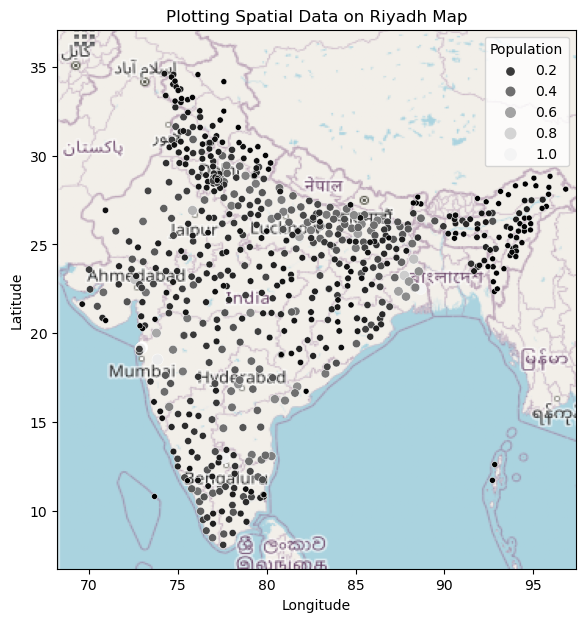

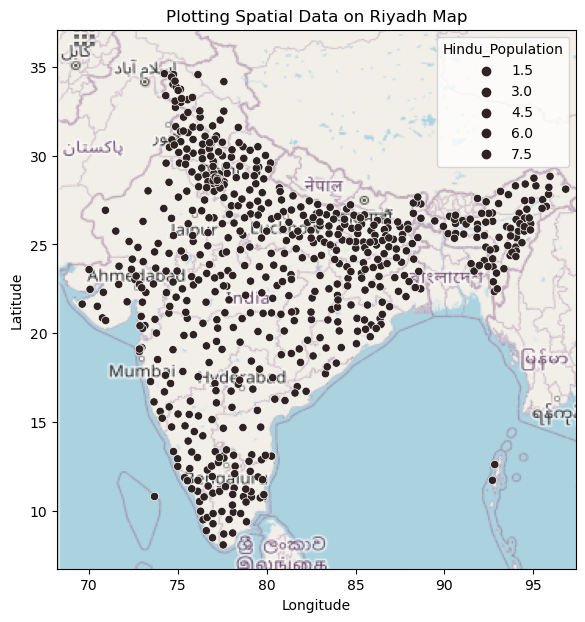

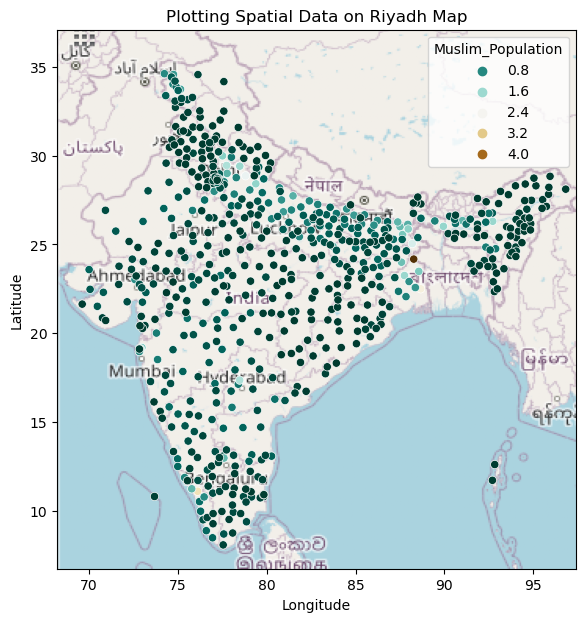

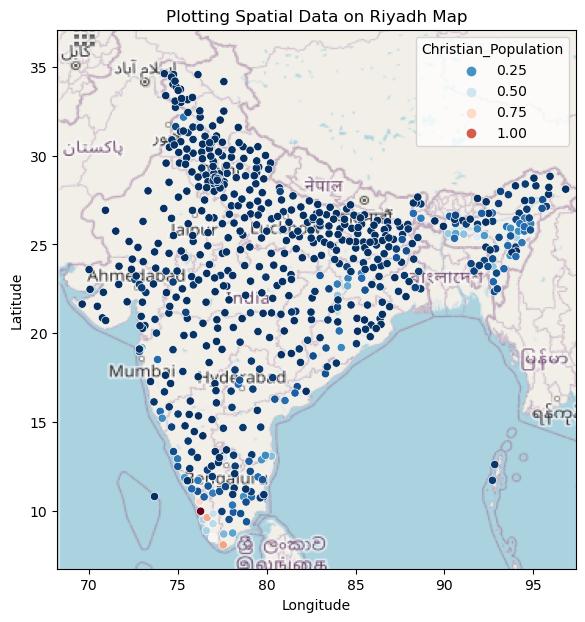

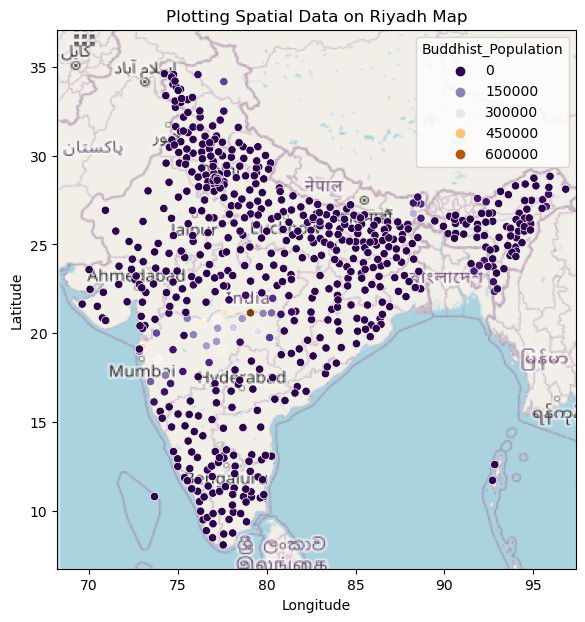

In [443]:
ruh_m = plt.imread('map_1.png')
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(data=df_without_outliers, x='Longitude', y='Latitude', hue='Population', palette='Greys_r', size='Population')
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ruh_m = plt.imread('map_1.png')
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(data=df_without_outliers, x='Longitude', y='Latitude', hue='Hindu_Population', palette='dark:salmon_r', hue_norm=(.1,.2))
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ruh_m = plt.imread('map_1.png')
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(data=df_without_outliers, x='Longitude', y='Latitude', hue='Muslim_Population', palette='BrBG_r')
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ruh_m = plt.imread('map_1.png')
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(data=df_without_outliers, x='Longitude', y='Latitude', hue='Christian_Population', palette='RdBu_r')
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ruh_m = plt.imread('map_1.png')
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(data=df_without_outliers, x='Longitude', y='Latitude', hue='Buddhist_Population', palette='PuOr_r')
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')